In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=2)

WAVE environment created.


In [12]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 512
ppo_epochs = 10
clip = 0.2
minibatch_size = 128
model = ppo_model.PPO(127, 2, hidden_layer, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip, lr=1e-4)

In [13]:
save_path = f'./results/env01/ppo/512-128-nstep-5-epoch-1e4lr-withmaxtimestep-maxstepforeacheptoo'
model.set_model_save_path(save_path)

In [5]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


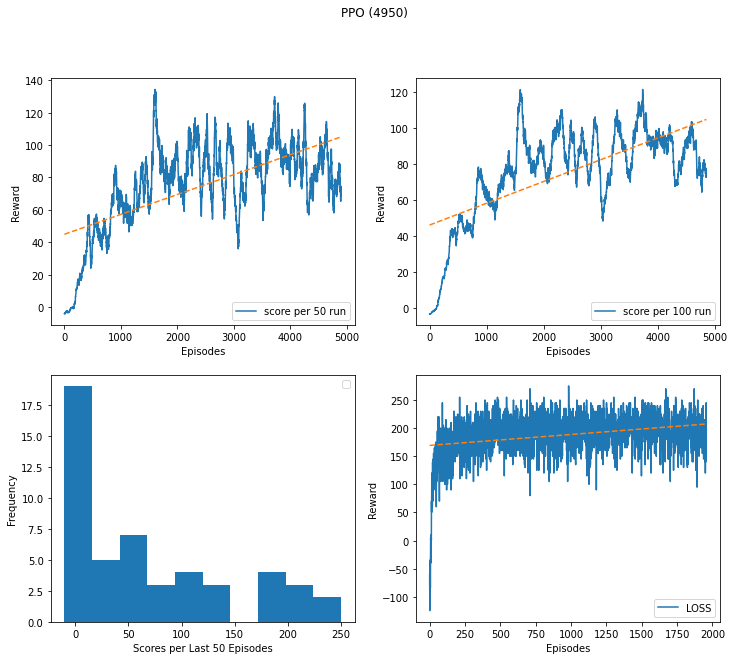

EPOCH: 4949, timestep: 1958055 total reward: -6.169999912381172, timestep: 24, lr: 0.0001
EPOCH: 4950, timestep: 1958130 total reward: 6.249998494982719, timestep: 75, lr: 0.0001
EPOCH: 4951, timestep: 1959130 total reward: 209.9999719262123, timestep: 1000, lr: 0.0001
EPOCH: 4952, timestep: 1960075 total reward: 162.7499766498804, timestep: 945, lr: 0.0001
EPOCH: 4953, timestep: 1961075 total reward: 239.999965518713, timestep: 1000, lr: 0.0001
EPOCH: 4954, timestep: 1961342 total reward: 56.649991020560265, timestep: 267, lr: 0.0001
EPOCH: 4955, timestep: 1961416 total reward: 6.319998949766159, timestep: 74, lr: 0.0001
EPOCH: 4956, timestep: 1961441 total reward: -6.230000138282776, timestep: 25, lr: 0.0001
EPOCH: 4957, timestep: 1961540 total reward: 5.089997574687004, timestep: 99, lr: 0.0001
EPOCH: 4958, timestep: 1962204 total reward: 151.79997868835926, timestep: 664, lr: 0.0001


In [14]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 5000, show_plot=True, lr_decay_interval=False)

In [7]:
model.save_model()

Model saved
Training history saved


In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

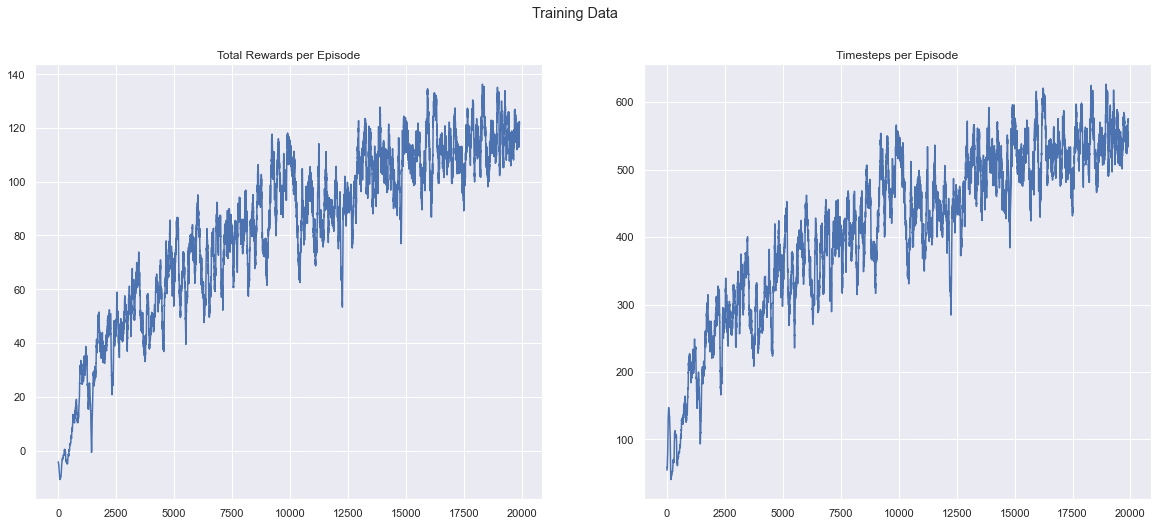

In [6]:
model.plot_train_memory(smooth=100)

In [8]:
env = wave.WaveEnv(env_path, 2, worker_id=1)
model.test(env)

WAVE environment created.


(300.309961527586, 1394)

In [7]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale, worker_id=4), 100, 40)

WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environ

(134.37758179724216, 643.83)

In [4]:
env.close()